In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error


In [2]:
# load the data
data = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\countries of the world.csv",decimal=',')
data.describe(include='all')

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


In [19]:
data.head(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,Climate_label,Total_GDP ($)
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,87.65,1.0,46.60,20.34,0.3800,0.240,0.380,0,0,2.173990e+10
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,74.49,3.0,15.11,5.22,0.2320,0.188,0.579,3,4,1.611745e+10
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,96.53,1.0,17.14,4.61,0.1010,0.600,0.298,6,0,1.975805e+11
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,75.00,2.0,22.46,3.27,0.1505,0.171,0.644,8,2,4.623520e+08
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,97.78,3.0,8.71,6.25,0.0220,0.245,0.720,10,4,1.352819e+09


Data Preparation

In [3]:
data.groupby('Region')[['GDP ($ per capita)','Literacy (%)','Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


In [4]:
for col in data.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = data.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = data.groupby('Region')[col].median()
    for region in data['Region'].unique():
        data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]
     

C:\Users\HP\AppData\Local\Temp\ipykernel_19684\4090014288.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]
C:\Users\HP\AppData\Local\Temp\ipykernel_19684\4090014288.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]
C:\Users\HP\AppData\Local\Temp\ipykernel_19684\4090014288.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

Data Exploration

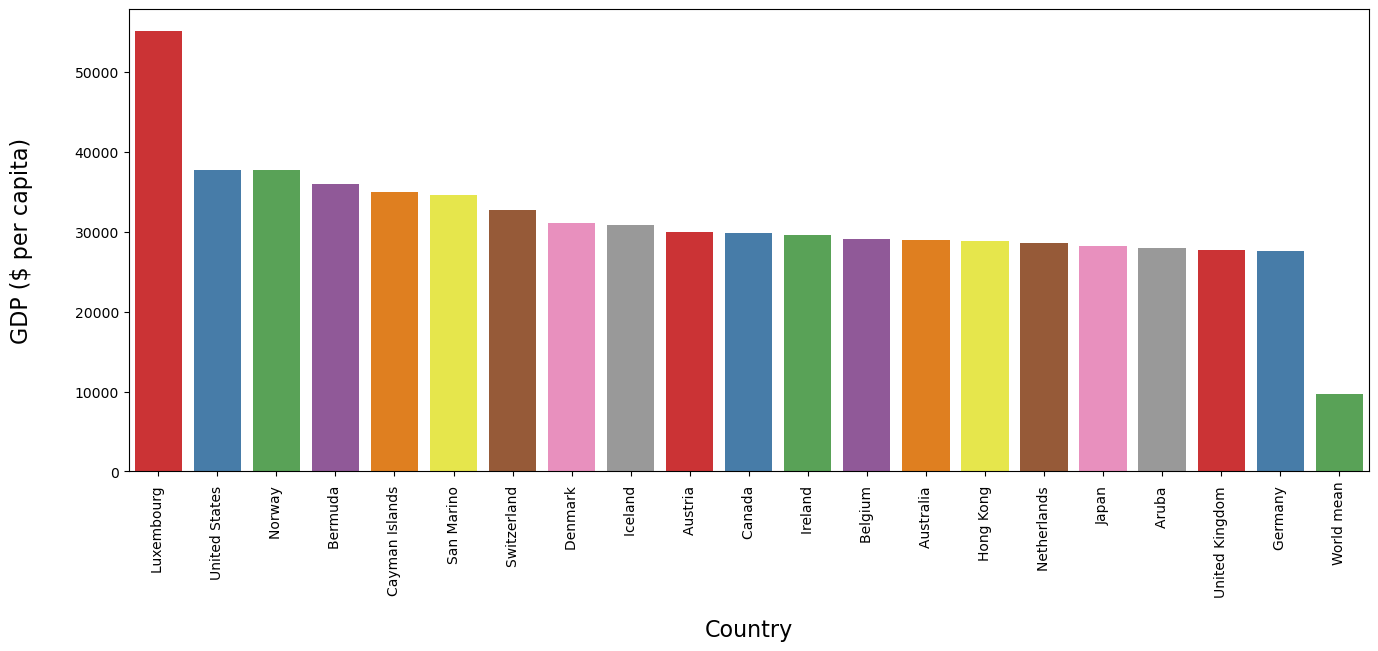

In [5]:
# Top 20 Countries with highest GDP per capita
fig, ax = plt.subplots(figsize=(16,6))
top_gdp_countries = data.sort_values('GDP ($ per capita)',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[data['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)

sns.barplot(x='Country',y='GDP ($ per capita)',data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()
     

#Correlation between Variables

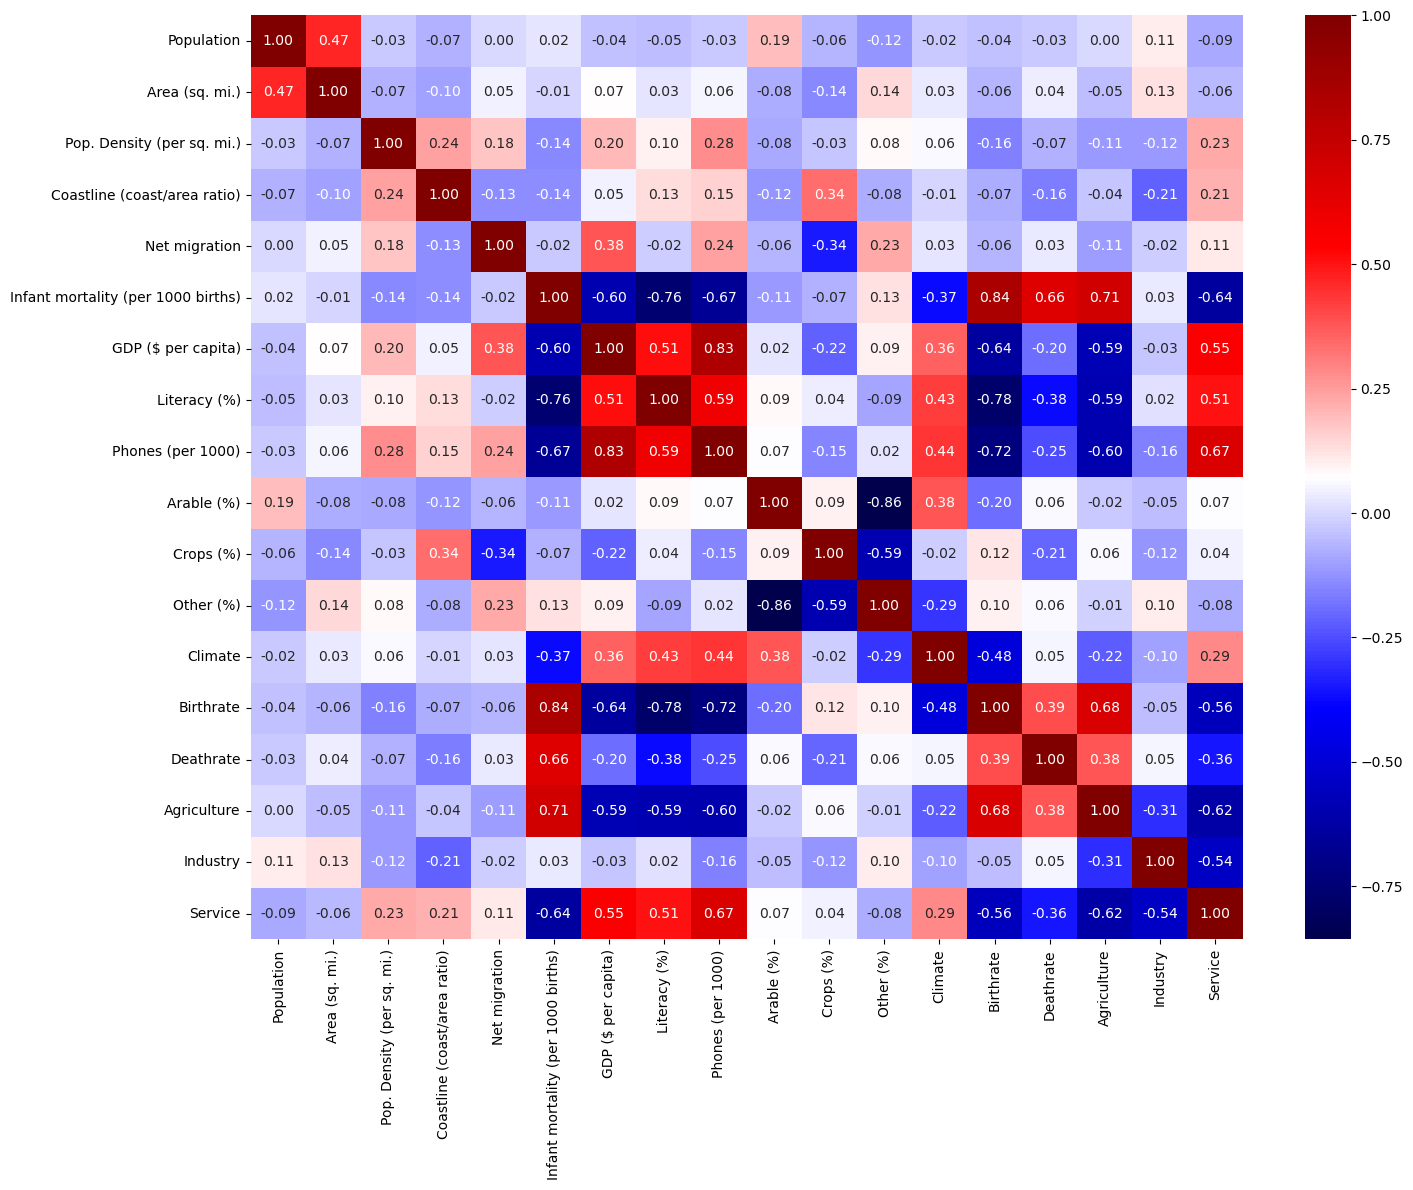

In [6]:

# heatmap to shows the correlation between all numerical columns
plt.figure(figsize=(16,12))
sns.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='seismic')
plt.show()
     

C:\Users\HP\AppData\Local\Temp\ipykernel_19684\290926037.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corr_to_gdp = pd.Series()


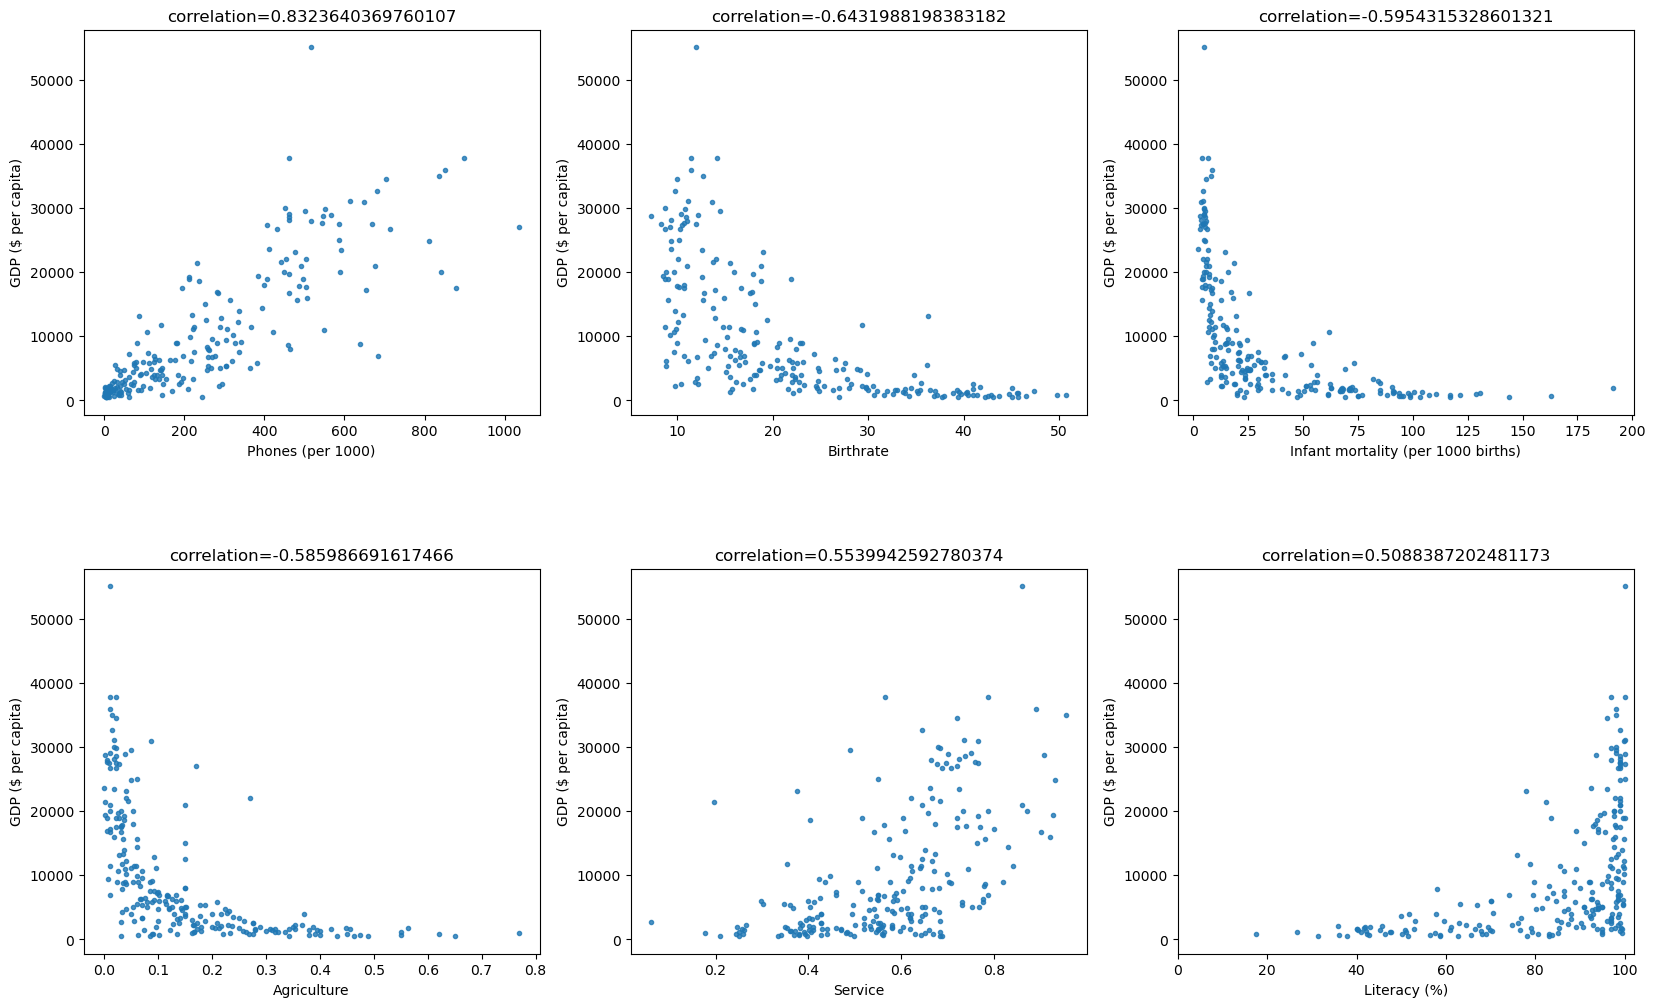

In [7]:
# Top Factors affecting GDP per capita
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = data['GDP ($ per capita)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [8]:

# Countries with low Birthrate and low GDP per capita
data.loc[(data['Birthrate']<14)&(data['GDP ($ per capita)']<10000)]
     

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418
18,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4.0,11.16,14.02,0.093,0.316,0.591
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,98.6,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
30,Bulgaria,EASTERN EUROPE,7385367,110910,66.6,0.32,-4.58,20.55,7600.0,98.6,336.3,40.02,1.92,58.06,3.0,9.65,14.27,0.093,0.304,0.603
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403
51,Cuba,LATIN AMER. & CARIB,11382820,110860,102.7,3.37,-1.58,6.33,2900.0,97.0,74.7,33.05,7.60,59.35,2.0,11.89,7.22,0.055,0.261,0.684
75,Georgia,C.W. OF IND. STATES,4661473,69700,66.9,0.44,-4.70,18.59,2500.0,99.0,146.6,11.44,3.86,84.70,3.0,10.41,9.23,0.172,0.275,0.553
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,98.6,260.0,22.26,1.81,75.93,3.0,12.02,8.77,0.118,0.319,0.563
168,Romania,EASTERN EUROPE,22303552,237500,93.9,0.09,-0.13,26.43,7000.0,98.4,196.9,40.82,2.25,56.93,3.0,10.70,11.77,0.101,0.350,0.549
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,7.33,0.11,92.56,4.0,9.95,14.65,0.054,0.371,0.575


# Modeling

In [9]:
LE = LabelEncoder()
data['Region_label'] = LE.fit_transform(data['Region'])
data['Climate_label'] = LE.fit_transform(data['Climate'])
data.head()
     

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,Climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579,3,4
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298,6,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644,8,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720,10,4


In [10]:

# Training and Testing the data
train, test = train_test_split(data, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'Region_label',
       'Climate_label','Service']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [11]:
# linear regression model
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 4314.170465109705 msle_train: 6.425416489842661
rmse_test: 5858.860714894477 msle_test: 3.9090633742976544


In [12]:
# Random forest model.
model = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 2727.9516603834804 msle_train: 0.18945787294152308
rmse_test: 4522.069981229462 msle_test: 0.21471277695703028


# Data Visualization

C:\Users\HP\AppData\Local\Temp\ipykernel_19684\2885813575.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test_Y = train_Y.append(test_Y)
C:\Users\HP\AppData\Local\Temp\ipykernel_19684\2885813575.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test_pred_Y = train_pred_Y.append(test_pred_Y)


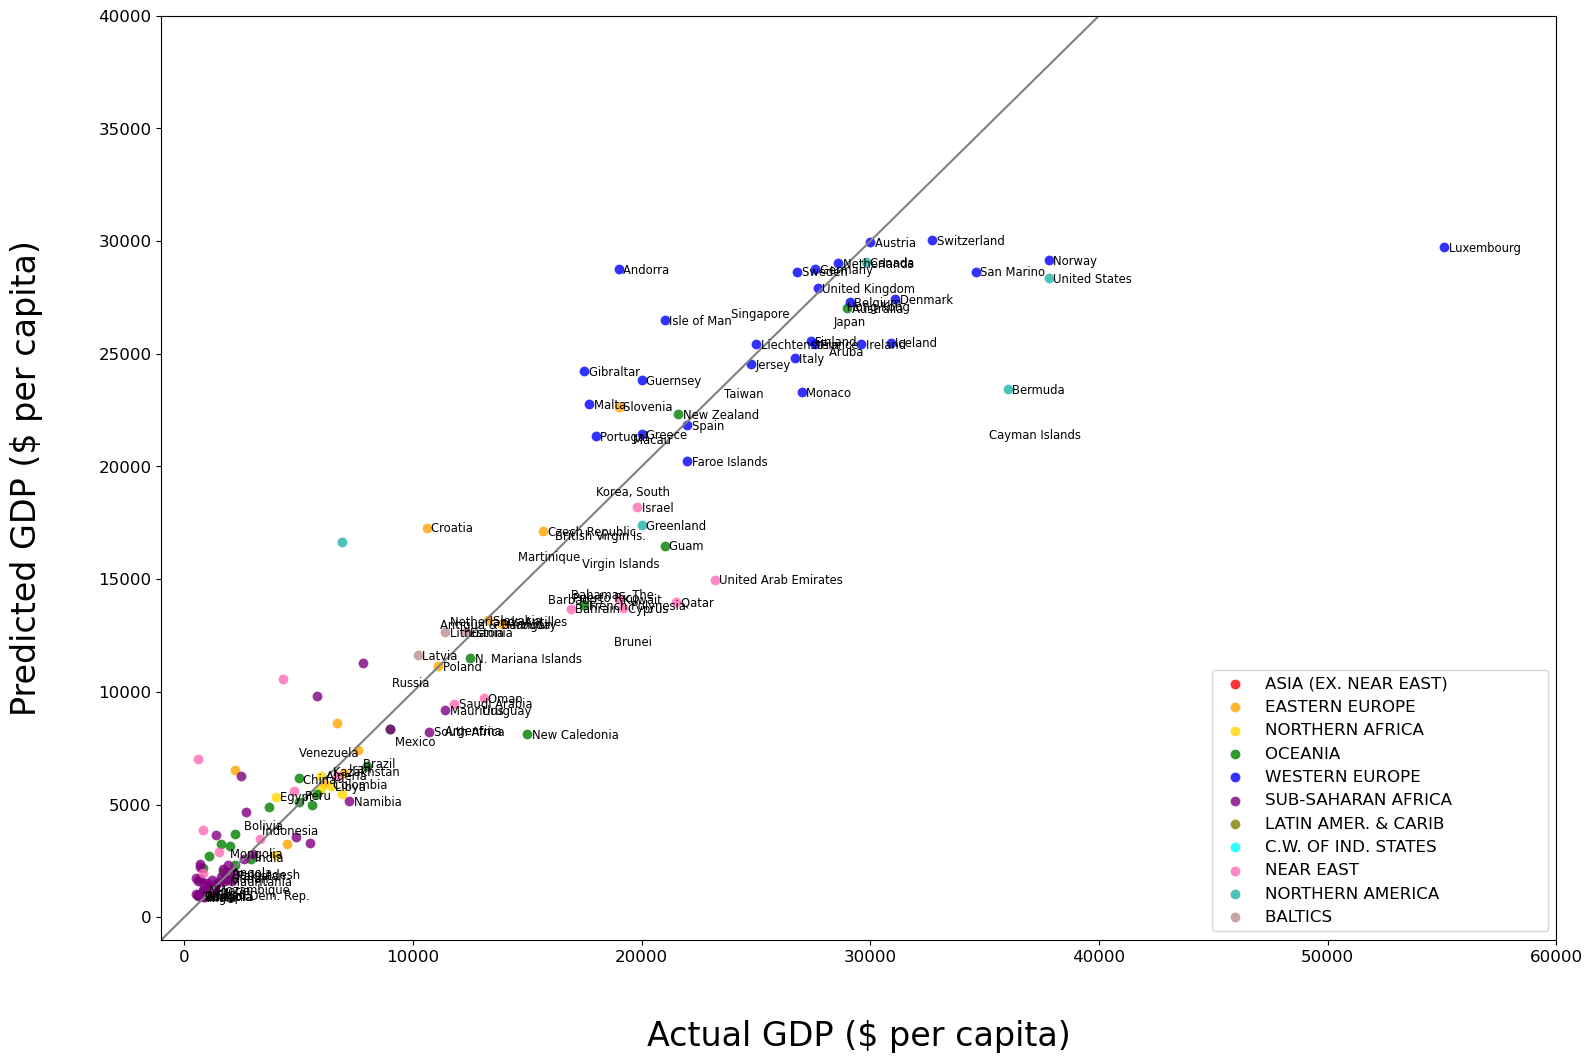

In [13]:
# Visualization of Results
plt.figure(figsize=(18,12))

train_test_Y = train_Y.append(test_Y)
train_test_pred_Y = train_pred_Y.append(test_pred_Y)

data_shuffled = data.loc[train_test_Y.index]
label = data_shuffled['Country']

colors = {'ASIA (EX. NEAR EAST)               ':'red',
          'EASTERN EUROPE                     ':'orange',
          'NORTHERN AFRICA                    ':'gold',
          'OCEANIA                            ':'green',
          'WESTERN EUROPE                     ':'blue',
          'SUB-SAHARAN AFRICA                 ':'purple',
          'LATIN AMER. & CARIB                ':'olive',
          'C.W. OF IND. STATES                ':'cyan',
          'NEAR EAST                          ':'hotpink',
          'NORTHERN AMERICA                   ':'lightseagreen',
          'BALTICS                            ':'rosybrown'}

for region, color in colors.items():
    X = train_test_Y.loc[data_shuffled['Region']==region]
    Y = train_test_pred_Y.loc[data_shuffled['Region']==region]
    ax = sns.regplot(x=X, y=Y, marker='.', fit_reg=False, color=color, scatter_kws={'s':200, 'linewidths':0}, label=region) 
plt.legend(loc=4,prop={'size': 12})  

ax.set_xlabel('Actual GDP ($ per capita)',labelpad=40)
ax.set_ylabel('Predicted GDP ($ per capita)',labelpad=40)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.tick_params(labelsize=12)
x = np.linspace(-1000,50000,100) # 100 linearly spaced numbers
y = x
plt.plot(x,y,c='gray')

plt.xlim(-1000,60000)
plt.ylim(-1000,40000)

for i in range(0,train_test_Y.shape[0]):
    if((data_shuffled['Area (sq. mi.)'].iloc[i]>8e5) |
       (data_shuffled['Population'].iloc[i]>1e8) |
       (data_shuffled['GDP ($ per capita)'].iloc[i]>10000)):
        plt.text(train_test_Y.iloc[i]+200, train_test_pred_Y.iloc[i]-200, label.iloc[i], size='small')
     

Total GDP

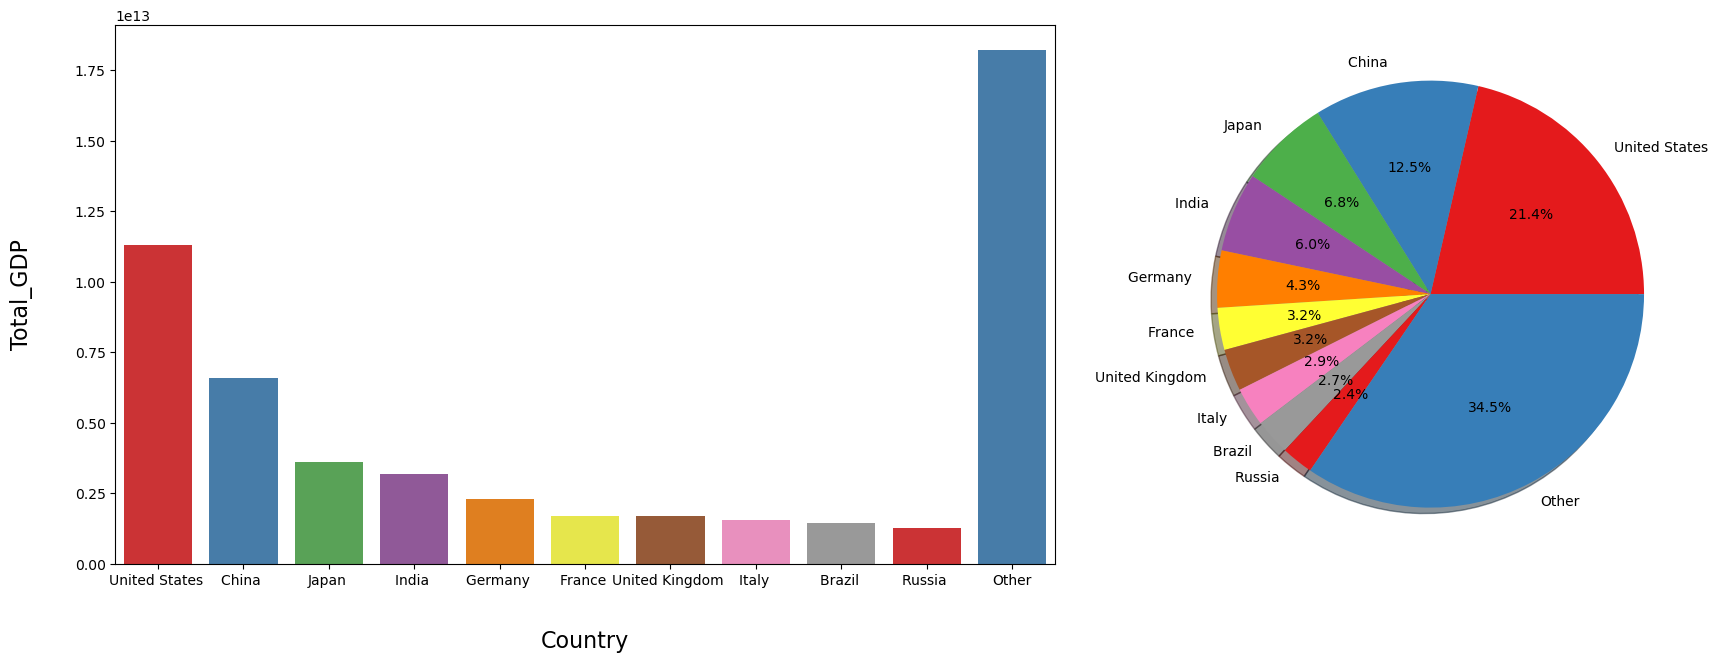

In [14]:
# Top 10 Coutries with highest total GDPs
data['Total_GDP ($)'] = data['GDP ($ per capita)'] * data['Population']
#plt.figure(figsize=(16,6))
top_gdp_countries = data.sort_values('Total_GDP ($)',ascending=False).head(10)
other = pd.DataFrame({'Country':['Other'], 'Total_GDP ($)':[data['Total_GDP ($)'].sum() - top_gdp_countries['Total_GDP ($)'].sum()]})
gdps = pd.concat([top_gdp_countries[['Country','Total_GDP ($)']],other],ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7),gridspec_kw = {'width_ratios':[2,1]})
sns.barplot(x='Country',y='Total_GDP ($)',data=gdps,ax=axes[0],palette='Set1')
axes[0].set_xlabel('Country',labelpad=30,fontsize=16)
axes[0].set_ylabel('Total_GDP',labelpad=30,fontsize=16)

colors = sns.color_palette("Set1", gdps.shape[0]).as_hex()
axes[1].pie(gdps['Total_GDP ($)'], labels=gdps['Country'],colors=colors,autopct='%1.1f%%',shadow=True)
axes[1].axis('equal')
plt.show()

In [15]:
# Compared the above ten countries rank in total GDP and GDP per capita
Rank1 = data[['Country','Total_GDP ($)']].sort_values('Total_GDP ($)', ascending=False).reset_index()
Rank2 = data[['Country','GDP ($ per capita)']].sort_values('GDP ($ per capita)', ascending=False).reset_index()
Rank1 = pd.Series(Rank1.index.values+1, index=Rank1.Country)
Rank2 = pd.Series(Rank2.index.values+1, index=Rank2.Country)
Rank_change = (Rank2-Rank1).sort_values(ascending=False)
print('Rank of Total GDP - Rank of GDP per capita:')
Rank_change.loc[top_gdp_countries.Country]

Rank of Total GDP - Rank of GDP per capita:


Country
United States        1
China              118
Japan               14
India              146
Germany             15
France              15
United Kingdom      12
Italy               17
Brazil              84
Russia              75
dtype: int64

In [16]:
# Factors affecting Total GDP
corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='Total_GDP ($)')&(col!='Climate')&(col!='GDP ($ per capita)')):
        corr_to_gdp[col] = data['Total_GDP ($)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]
print(corr_to_gdp)

Population                            0.639528
Area (sq. mi.)                        0.556396
Phones (per 1000)                     0.233484
Birthrate                            -0.166889
Agriculture                          -0.139516
Arable (%)                            0.129928
Climate_label                         0.125791
Infant mortality (per 1000 births)   -0.122076
Literacy (%)                          0.099417
Service                               0.085096
Region_label                         -0.079745
Crops (%)                            -0.077078
Coastline (coast/area ratio)         -0.065211
Other (%)                            -0.064882
Net migration                         0.054632
Industry                              0.050399
Deathrate                            -0.035820
Pop. Density (per sq. mi.)           -0.028487
dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_19684\3047900780.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corr_to_gdp = pd.Series()


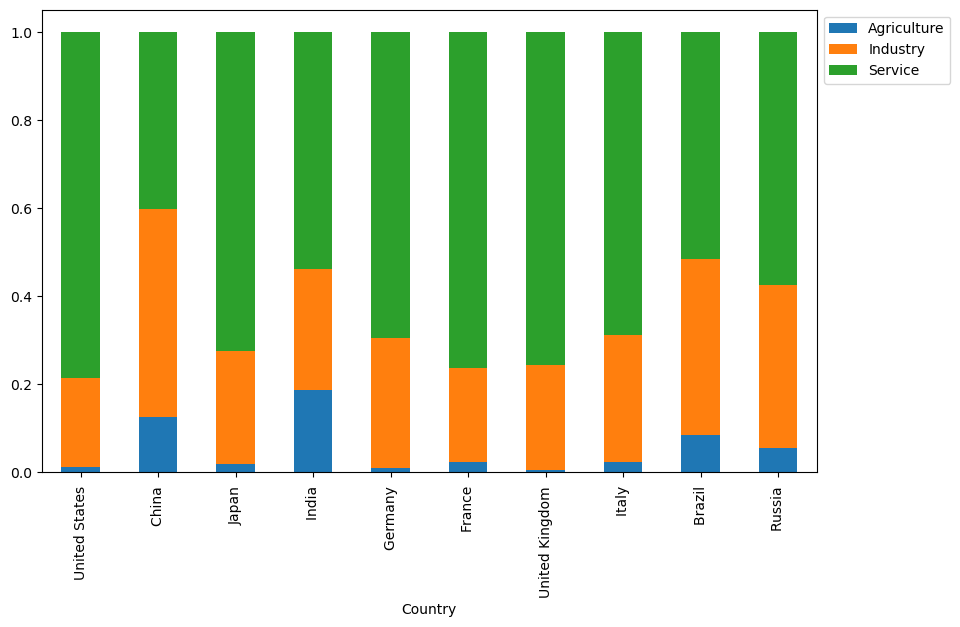

In [17]:
# Comparison of the economy structure for the Top 10
plot_data = top_gdp_countries.head(10)[['Country','Agriculture', 'Industry', 'Service']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

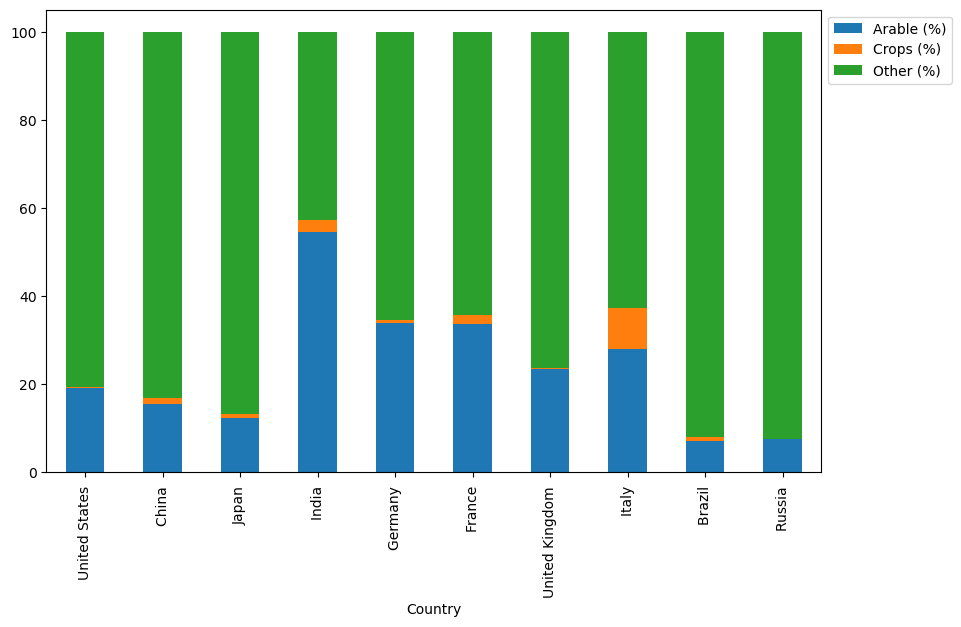

In [18]:
# Comparison of land usage for the Top 10
plot_data = top_gdp_countries[['Country','Arable (%)', 'Crops (%)', 'Other (%)']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()
     


# Cluster Analysis

In [21]:
df=data[["Population","GDP ($ per capita)"]]

In [22]:
df

,Population,GDP ($ per capita)
0,31056997,700.0
1,3581655,4500.0
2,32930091,6000.0
3,57794,8000.0
4,71201,19000.0
...,...,...
222,2460492,800.0
223,273008,6000.0
224,21456188,800.0
225,11502010,800.0


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Scale the DataFrame
scaled_df = scaler.fit_transform(df)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)


In [24]:
scaled_df

,Population,GDP ($ per capita)
0,0.023631,0.003663
1,0.002720,0.073260
2,0.025056,0.100733
3,0.000039,0.137363
4,0.000049,0.338828
...,...,...
222,0.001867,0.005495
223,0.000202,0.100733
224,0.016324,0.005495
225,0.008748,0.005495


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

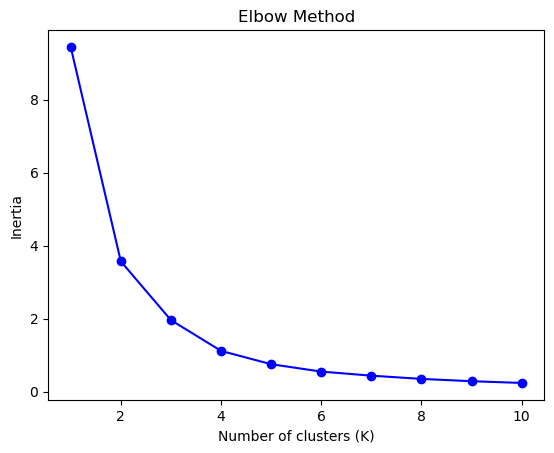

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define a range of K values
k_values = range(1, 11)
inertias = []

# Perform K-means clustering for each K value
for k in k_values:
    # Create an instance of KMeans with the current K value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the scaled data to the K-means model
    kmeans.fit(scaled_df)
    
    # Append the inertia to the list
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [26]:
from sklearn.cluster import KMeans

# Define the number of clusters
k = 3

# Create an instance of KMeans with the specified number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the scaled data to the K-means model
kmeans.fit(scaled_df)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Assign the cluster labels back to the DataFrame
scaled_df['Cluster'] = cluster_labels

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
# Print the result of clustering
print(scaled_df)


     Population  GDP ($ per capita)  Cluster
0      0.023631            0.003663        0
1      0.002720            0.073260        0
2      0.025056            0.100733        0
3      0.000039            0.137363        0
4      0.000049            0.338828        1
..          ...                 ...      ...
222    0.001867            0.005495        0
223    0.000202            0.100733        0
224    0.016324            0.005495        0
225    0.008748            0.005495        0
226    0.009308            0.025641        0

[227 rows x 3 columns]


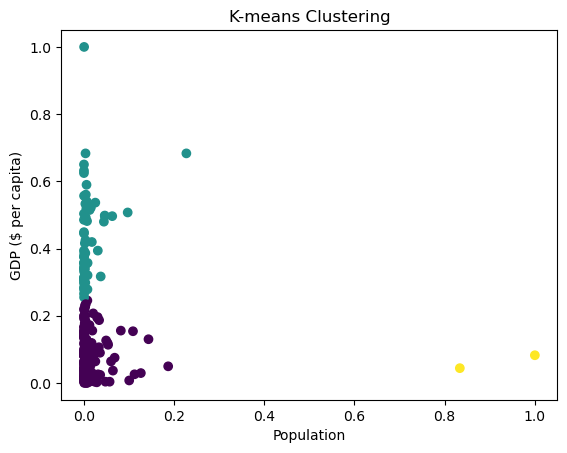

In [27]:
import matplotlib.pyplot as plt

# Plotting the clusters
plt.scatter(scaled_df['Population'], scaled_df['GDP ($ per capita)'],
            c=scaled_df['Cluster'], cmap='viridis')
plt.xlabel('Population')
plt.ylabel('GDP ($ per capita)')
plt.title('K-means Clustering')
plt.show()

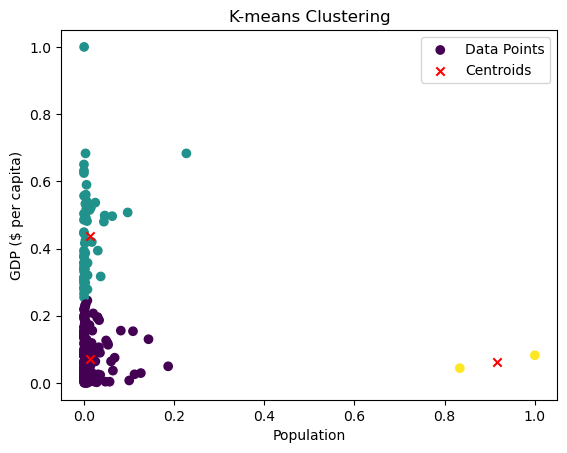

In [33]:
import matplotlib.pyplot as plt

# Plotting the data points
plt.scatter(scaled_df['Population'], scaled_df['GDP ($ per capita)'],
            c=scaled_df['Cluster'], cmap='viridis', label='Data Points')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', label='Centroids')

plt.xlabel('Population')
plt.ylabel('GDP ($ per capita)')
plt.title('K-means Clustering')
plt.legend()
plt.show()


In [28]:
group_counts = scaled_df['Cluster'].value_counts()
print(group_counts)

0    165
1     60
2      2
Name: Cluster, dtype: int64


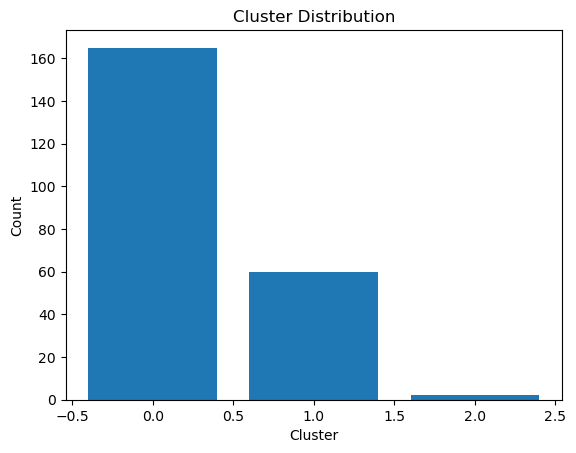

In [32]:
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame and 'Cluster' is the column containing cluster labels
group_counts = scaled_df['Cluster'].value_counts()

# Plotting the clusters
plt.bar(group_counts.index, group_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.show()

In [29]:
scaled_df['Cluster'] = kmeans.labels_
cluster_means = scaled_df.groupby('Cluster').mean()

In [30]:
cluster_means

,Population,GDP ($ per capita)
Cluster,,
0,0.014380,0.071762
1,0.012626,0.436203
2,0.916809,0.063187


In [36]:
 #perform cluster interpretation
for i, cluster in cluster_means.iterrows():
    print('Cluster {}:'.format(i+1))
    print(' - Mean Population : {:.2f}'.format(cluster['Population']))
    
    print(' - Mean GDP ($ per capita): {:.2f}'.format(cluster['GDP ($ per capita)']))
    
    print('')

Cluster 1:
 - Mean Population : 0.01
 - Mean GDP ($ per capita): 0.07

Cluster 2:
 - Mean Population : 0.01
 - Mean GDP ($ per capita): 0.44

Cluster 3:
 - Mean Population : 0.92
 - Mean GDP ($ per capita): 0.06



In [37]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = scaled_df.drop('Cluster', axis=1)
y = scaled_df['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [39]:
# Predict cluster assignments for the testing set
y_pred = classifier.predict(X_test)


In [40]:
from sklearn.metrics import classification_report

# Generate a classification report to evaluate the model performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        10

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



The classification report   indicates the performance metrics of the predictive model for each cluster:

- Precision: Precision measures the proportion of true positive predictions out of all positive predictions. A precision score of 1.00 means that the model achieved perfect precision for both clusters 0 and 1, indicating that all predicted instances in each cluster were correct.

- Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of all actual positive instances. A recall score of 1.00 means that the model correctly identified all instances of both clusters 0 and 1.

- F1-Score: The F1-score is the harmonic mean of precision and recall and provides a balanced measure of the model's performance. A score of 1.00 for both clusters indicates that the model achieved perfect precision and recall.

- Support: The support column indicates the number of instances in each cluster in the testing set.

The overall accuracy of the model is also reported as 1.00, indicating that it correctly predicted the cluster assignments for all instances in the testing set.

These results suggest that the predictive model performed extremely well in classifying the data points into their respective clusters, achieving perfect precision, recall, and F1-scores for both clusters. However, it is important to note that these results are based on the specific dataset and model used in this example. The performance may vary with different datasets and models.

In [45]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette coefficient for the clustering
silhouette_avg = silhouette_score(scaled_df, cluster_labels)

print("Silhouette Coefficient: {:.3f}".format(silhouette_avg))


Silhouette Coefficient: 0.907


A silhouette coefficient of 0.907 indicates that the clustering results are quite good. The silhouette coefficient ranges between -1 and 1, with values closer to 1 indicating well-separated clusters and values closer to -1 suggesting overlapping or poorly separated clusters. A coefficient of 0 suggests that the clusters are close to the decision boundary.

In our case, a silhouette coefficient of 0.907 indicates that the clusters are well-separated and have a high degree of compactness within each cluster. This suggests that the clustering algorithm effectively grouped the data points into distinct and cohesive clusters.

Overall, a silhouette coefficient of 0.907 is considered a very good result, indicating that the clustering algorithm performed well in creating distinct and well-separated clusters in your data.

In [1]:
scaled_df

NameError: name 'scaled_df' is not defined